## 1. Building tf-idf document vectors
In the [last chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/NLP/Feature%20Engineering%20for%20NLP/N-Gram%20models.ipynb), we learned about `n-gram modeling`.

### n-gram modeling
In `n-gram` modeling, the weight of a dimension for the vector representation of a document is dependent on the number of times the word corresponding to the dimension occurs in the document. 

Let's say we have a document that has the word `'human'` occurring 5 times. Then, the dimension of its vector representation corresponding to `'human'` would have the value 5.
#### Motivation
However, some words occur very commonly across all the documents in the `corpus`. As a result, the **vector representations** get more characterized by these dimensions. Consider a corpus of documents on the `Universe`. 
- Let's say there is a particular document on Jupiter where the word `'jupiter'` and `'universe'` both **occur about 20 times**. 
- However, `'jupiter'` rarely figures in the other documents whereas `'universe'` is just **as common**. 
- We could argue that although both *`jupiter`* and *`universe`* occur 20 times, *jupiter* should be given a larger weight on account of its **exclusivity**. 

In other words, the word `'jupiter'` characterizes the document more than `'universe'`.

#### Applications
Weighting words this way has a huge number of applications. 
- They can be used to **automatically detect stopwords** for the corpus instead of relying on a generic list. 
- They're used in **search** algorithms **to determine the ranking of pages containing the search query** and 
- In **recommender systems** as we will soon find out. 

In a lot of cases, this kind of weighting also generates better performance during predictive modeling.

#### Term frequency-inverse document frequency
The weighting mechanism we've described is known as `term frequency-inverse document frequency` or `tf-idf` for short. 

It is based on the idea that the `weight of a term` in a document should be 
- **proportional** to `its frequency` and 
- an **inverse function** of the `number of documents in which it occurs`.

#### Mathematical formula
Mathematically, the `weight` of a `term` `i` in `document` `j` (denoted $w_{i, j}$) is computed as `term frequency` of the term `i` in document `j` (denoted by $\text{tf}_{i,j}$) multiplied by the `log` of the ratio of the number of documents $N$ in the corpus and the number of documents in which the term i occurs or $\text{df}_i$.

$$ w_{i, j} = \text{tf}_{i,j} \times \log \left( \dfrac{N}{\text{df}_i} \right) $$

Therefore, let's say the word `'library'` occurs in a document 5 times. 
- There are 20 documents in the corpus and 'library' occurs in 8 of them. 
- Then, the `tf-idf weight` of `'library'` in the vector representation of this document will be $$ 5 \times \log \left( \dfrac{20}{8} \right) \approx 2. $$ 

In general, **higher the `tf-idf weight`, more important is the word in characterizing the document**. 

A **high** `tf-idf weight` for a word in a document may imply that the word is **relatively exclusive to that particular document** or that the word **occurs extremely commonly in the document**, or both.

#### `tf-idf` using `scikit-learn`
Generating vectors that use `tf-idf` weighting is almost identical to what we've already done so far. 

Instead of using `CountVectorizer`, we use the `TfidfVectorizer` class of `scikit-learn`. 

In [1]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a corpus-document
corpus = ["Hello there, anyone here?", "Good morning! Have a nice day", "Captain was in the hole"]

- The `parameters` and `methods` it has is **almost identical** to `CountVectorizer`. 
- The **only difference** is that `TfidfVectorizer` assigns weights using the `tf-idf formula` from before and has extra parameters related to inverse document frequency which we will not cover in this course. 

Here, we can see how using `TfidfVectorizer` is almost identical to using `CountVectorizer` for a `corpus`. 

However, notice that the weights are non-integer and reflect values calculated by the `tf-idf formula`.

In [2]:
import numpy as np
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(corpus)
np.round(tfidf_matrix.toarray(), 3)

array([[0.5  , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.5  , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.   , 0.   , 0.447, 0.447, 0.447, 0.   , 0.   , 0.   , 0.   ,
        0.447, 0.447, 0.   , 0.   , 0.   ],
       [0.   , 0.447, 0.   , 0.   , 0.   , 0.   , 0.   , 0.447, 0.447,
        0.   , 0.   , 0.447, 0.   , 0.447]])

### 1.2. PRACTICES
#### Exercise 1.2.1. `tf-idf weight` of commonly occurring words
The word `"bottle"` occurs `5` times in a particular `document D` and also occurs in every document of the `corpus`. What is the `tf-idf` weight of `"bottle"` in `D`?
#### Answer.
The `tf-idf weight` for bottle in every document will be $0$. 

This is because the inverse `document frequency` is constant across documents in a corpus and since `bottle` occurs in every document, its value is 

$$ \log(1) = 0$$

#### Exercise 1.2.2. tf-idf vectors for TED talks
In this exercise, you have been given a corpus `ted` which contains the transcripts of 500 TED Talks. 

Your task is to generate the `tf-idf vectors` for these talks.

In [3]:
import pandas as pd
ted_df = pd.read_csv(r'../input/nlp-fe-datasets/ted.csv')
ted = ted_df.transcript

In a later lesson, we will use these vectors to generate recommendations of similar talks based on the transcript.
#### SOLUTION.

In [4]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


**Comments.** 

You can use these vectors to perform predictive modeling just like we did with `CountVectorizer`. 

In the next few lessons, we will see another extremely useful application of the vectorized form of documents: generating recommendations.

## 2. Cosine similarity
### 2.1. Theory
We now know how to compute vectors out of text documents. With this representation in mind, let us now explore techniques that will allow us to determine how similar two vectors and consequentially two documents, are to each other. 

More specifically, we will learn about the cosine similarity score which is one of the most popularly used similarity metrics in `NLP`.

#### Mathematical formula
Very simply put, the cosine similarity score of two vectors is the `cosine` of the angle between the vectors. 

Mathematically, it is the `ratio` of the dot product of the vectors and the product of the magnitude of the two vectors. 

####  Implementation using scikit-learn
`Scikit-learn` offers a `cosine_similarity` function that outputs a similarity matrix containing the pairwise cosine scores for a set of vectors. 

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X = [(1,2,0)], 
                  Y = [(1,2,3)])

array([[0.5976143]])

- However, remember that `cosine_similarity` takes in `2-D arrays` as arguments. 
- Passing in `1-D arrays` will throw an error.

### 2.2. PRACTICES
#### Exercise 2.2.1. Range of cosine scores
Which is the possible cosine score for a pair of document vectors?
#### Answers. 
Non-negative weights, the cosine score lies between 0 and 1.

#### Exercise 2.2.2. Computing dot product
In this exercise, we will learn to compute the dot product between two vectors, `A = (1, 3)` and `B = (-2, 2)`, using the `numpy library`. 

More specifically, we will use the `np.dot()` function to compute the dot product of two numpy arrays.
#### SOLUTION

In [6]:
# Initialize numpy vectors
A = np.array([1, 3])
B = np.array([-2, 2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

4


#### Exercise 2.2.3. Cosine similarity matrix of a corpus
In this exercise, you have been given a corpus, which is a list containing five sentences. 

The `corpus` is printed in the console.

In [7]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

You have to compute the `cosine similarity matrix` which contains the pairwise cosine similarity score for every pair of sentences (vectorized using `tf-idf`).

Remember, the value corresponding to the `ith row` and `jth column` of a `similarity matrix` denotes the `similarity score` for the `ith` and `jth vector`.
#### SOLUTION

In [8]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


**Comments.**

From our `similarity matrix`, we see that the `first` and the `second sentence` are the most similar. 

Also the `fifth sentence` has, on average, the lowest pairwise cosine scores. 

This is **intuitive as it contains entities that are not present in the other sentences**.

## 3. Building a plot line based recommender
### 3.1. Theory.
In this section, we will use `tf-idf vectors` and `cosine scores` to build a recommender system that suggests movies based on overviews.
#### Movie recommender
We've a dataset containing movie overviews. 

Here, we can see two movies, `"Shanghai Triad"` and `"Cry, the Beloved Country"` and their overviews.

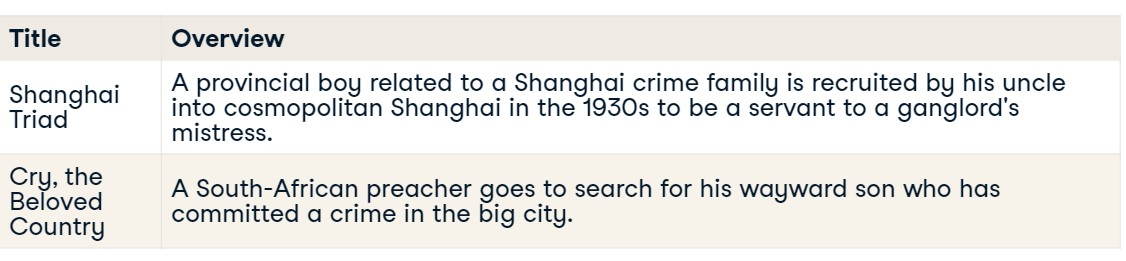

In [9]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

Our task is to build a system that takes in a movie title and outputs a list of movies that has similar plot lines. 

For instance, if we passed in `'The Godfather'`, we could expect output like this. 

Notice how a lot of the movies listed here have to do with crime and gangsters, just like `The Godfather`.

#### Steps
Following are the steps involved. 
- The first step, as always, is to **preprocess movie overviews**. 
- The next step is to **generate the `tf-idf vectors` for our overviews**. 
- Finally, we **generate a `cosine similarity matrix`** which contains the *pairwise similarity scores* of every movie with every other movie. 

Once the `cosine similarity matrix` is computed, we can proceed to build the `recommender function`.

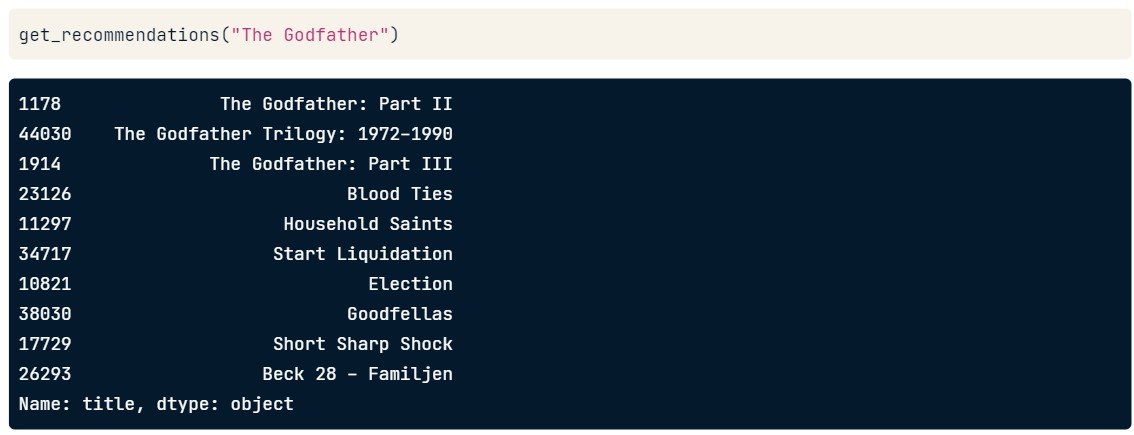

In [10]:
## Hình minh họa Image(fig1, height, width)

#### The `recommender function`
We will build a `recommender function` as part of this section. 

Let's take a look at how it works. The `recommender function` takes
- a `movie title`, 
- the `cosine similarity matrix` and
- an `indices series` 

as arguments. 

> The `indices series` is a reverse mapping of `movie titles` with their indices in the original dataframe. 

> The function **extracts the pairwise `cosine similarity scores`** of the `movie` passed in with every `other movie`. 

> Next, it sorts these `scores` in `descending order`.

> Finally, it outputs the titles of movies corresponding to the `highest similarity scores`. 

**Note that the function ignores the highest similarity score of 1**. This is because the **movie most similar to a given movie is the movie itself**!

In [11]:
movie_df = pd.read_csv(r"../input/nlp-fe-datasets/movie_overviews.csv")
movie_plots = movie_df.title
movie_plots.head(3)

0           Toy Story
1             Jumanji
2    Grumpier Old Men
Name: title, dtype: object

#### Step 1. Generating `tf-idf` vectors
Let's say we already have the preprocessed movie overviews as `'movie_plots'`. 

We already know how to generate the `tf-idf vectors`.

In [12]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(movie_plots)
tfidf_matrix.toarray().shape

(9099, 7270)

#### Step 2. Generating cosine similarity matrix
Generating the `cosine similarity matrix` is also extremely simple. 
- We simply pass in `tfidf_matrix` as both the `first` and `second` argument of `cosine_similarity`. This **generates a matrix that contains the pairwise similarity score** of every movie with every other movie. 
- The value corresponding to the `ith row` and the `jth column` is the `cosine similarity score` of `movie i` with `movie j`. 

Notice that the `diagonal elements` of this matrix is `1`. This is because, as stated earlier, the **`cosine similarity score` of movie `k` with `itself` is `1`**.

In [13]:
cosin_siml = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosin_siml[:3, :3]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Step 3. The `linear_kernel` function
The `magnitude` of a `tf-idf vector` is always `1`. 

Recall from the previous lesson that the `cosine score` is computed as the `ratio` of the `dot product` and the `product` of the `magnitude` of the `vectors`. 

Since the `magnitude is 1`, the `cosine score` of two `tf-idf` vectors is **equal** to their `dot product`! This fact can help us greatly improve the `speed of computation` of our `cosine similarity matrix` as we do **not need to compute the `magnitudes` while working with `tf-idf vectors`**. 

Therefore, while working with `tf-idf vectors`, we can use the `linear_kernel function` which computes the pairwise dot product of every vector with every other vector.

In [14]:
from sklearn.metrics.pairwise import linear_kernel

#### Step 4. Generating cosine similarity matrix
Let us replace the `cosine_similarity` function with `linear_kernel`. 

As you can see, the output remains the same but it takes significantly lesser time to compute.

In [15]:
cosin_siml_lin_ker = linear_kernel(tfidf_matrix, tfidf_matrix)
cosin_siml_lin_ker[:3, :3]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### The get_recommendations function
The `recommender function` and the `indices series` described earlier will be built in the exercises. 

You can use this function to generate recommendations using the `cosine similarity matrix`.

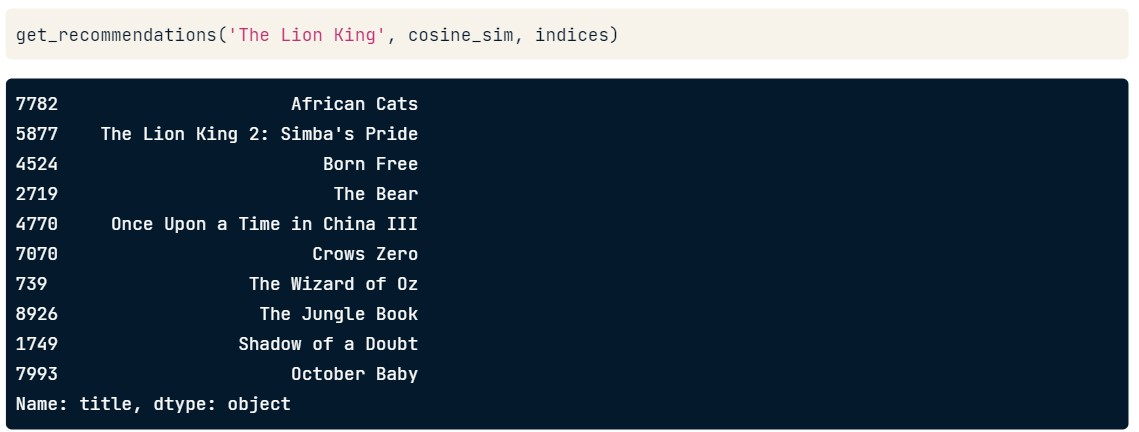

In [16]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES
#### Exercise 3.2.1. Comparing linear_kernel and cosine_similarity
In this exercise, you have been given `tfidf_matrix` which contains the `tf-idf vectors` of a thousand documents. Your task is to generate the `cosine similarity matrix` for these vectors first using `cosine_similarity` and then, using `linear_kernel`.

We will then compare the computation times for both functions.
#### Step 1.
Compute the cosine similarity matrix for `tfidf_matrix` using `cosine_similarity`.

In [17]:
import time

# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Time taken: 0.8777508735656738 seconds


**Step 2.** Compute the cosine similarity matrix for `tfidf_matrix` using `linear_kernel`.

In [18]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Time taken: 0.8757541179656982 seconds


**Comments.**

Notice how both `linear_kernel` and `cosine_similarity` produced the `same result`. 
- However, `linear_kernel` took a **smaller amount of time** to execute. 
- When you're working with a **very large amount of data** and your `vectors are in the tf-idf representation`, it is good practice to default to `linear_kernel` to **improve performance**. (NOTE: In case, you see `linear_kernel` taking more time, it's because the dataset we're **dealing with is extremely small** and **Python's time module** is *incapable of capture such minute time differences accurately*.)

#### Exercise 3.2.2. The `recommender function`
In this exercise, we will build a recommender function `get_recommendations()`, as discussed in the lesson and the next exercise. 

As we know, it  
- `takes in` a `title`, a `cosine similarity matrix`, and a `movie title` and `index mapping` as `arguments` and 
- `outputs` a `list of 10 titles most similar` to the `original title` **(excluding the title itself)**.

In [19]:
metadata = pd.read_csv(r"../input/nlp-fe-datasets/movie_overviews.csv", 
                       usecols = ['title', 'tagline'])
metadata = metadata.dropna()
metadata.head()

,title,tagline
1,Jumanji,Roll the dice and unleash the excitement!
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...
3,Waiting to Exhale,Friends are the people who let you be yourself...
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...
5,Heat,A Los Angeles Crime Saga


You have been given a dataset `metadata` that consists of the `movie titles` and `overviews`. 

#### SOLUTION

In [20]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index = metadata['title']).drop_duplicates()
print(indices[:5])

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].loc[movie_indices]

title
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
dtype: int64


#### Exercise 3.2.3. Plot recommendation engine
In this exercise, we will build a recommendation engine that suggests movies based on similarity of plot lines. 

You have been given a `get_recommendations()` function that takes in the title of a movie, a similarity matrix and an indices series as its arguments and outputs a list of most similar movies. indices has already been provided to you.

In [21]:
movies_plots = pd.read_csv(r"../input/nlp-fe-datasets/movie_overviews.csv")
movies_plots = movies_plots.overview
movies_plots.head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

You have also been given a `movie_plots` Series that contains the plot lines of several movies. 

Your task is to generate a `cosine similarity matrix` for the `tf-idf vectors` of these plots.

Consequently, we will check the potency of our engine by generating recommendations for one of my favorite movies, `The Dark Knight Rises`.

#### SOLUTION.

In [22]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words = 'english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices[:len(movies_plots)]))

132                              Batman Forever
6907                            The Dark Knight
1116                             Batman Returns
7573                 Batman: Under the Red Hood
524                                      Batman
7907                           Batman: Year One
8171    Batman: The Dark Knight Returns, Part 1
2581               Batman: Mask of the Phantasm
8232    Batman: The Dark Knight Returns, Part 2
6150                              Batman Begins
Name: title, dtype: object


**Comments.**

Notice how the recommender correctly identifies `'The Dark Knight Rises'` as a `Batman movie` and recommends other `Batman movies` as a result. 

This sytem is, of course, very primitive and there are a host of ways in which it could be improved. One method would be to look at the cast, crew and genre in addition to the plot to generate recommendations. 

We will not be covering this in this course but you have all the tools necessary to accomplish this.

#### Exercise 3.2.4. TED talk recommender
In this exercise, we will build a recommendation system that suggests `TED Talks` based on their transcripts. You have been given a `get_recommendations()` function that takes in the title of a talk, a similarity matrix and an indices series as its arguments, and outputs a list of most similar talks. indices has already been provided to you.
#### SOLUTION

In [23]:
metadata = pd.read_csv(r"../input/ted-talks/ted_main.csv")
ted = pd.read_csv(r"../input/ted-talks/transcripts.csv")
indices = pd.Series(metadata.index, index = metadata['title']).drop_duplicates()
indices["5 ways to kill your dreams"]

1951

You have also been given a transcripts series that contains the transcripts of around 500 TED talks. Your task is to generate a cosine similarity matrix for the `tf-idf vectors` of the talk transcripts.

Consequently, we will generate recommendations for a talk titled `'5 ways to kill your dreams'` by Brazilian entrepreneur Bel Pesce.

In [24]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words = 'english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(ted.transcript)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations("5 ways to kill your dreams", cosine_sim, indices))

911                                The antidote to apathy
1201                            Moral behavior in animals
26                      Why the universe seems so strange
305     The Blur Building and other tech-empowered arc...
2029    How young blood might help reverse aging. Yes,...
1021                                     Doodlers, unite!
420                            Scenes from "My Architect"
1528          Meet BRCK, Internet access built for Africa
671                    Radical women, embracing tradition
2271                     Why you should talk to strangers
Name: title, dtype: object


**Comments.**

This recommender works surprisingly well despite being trained only on a small subset of TED talks. 

In fact, three of the talks recommended by our system is also recommended by the official TED website as talks to watch next after `'5 ways to kill your dreams'`!

## 4. Beyond n-grams: word embeddings
We have covered a lot of ground in the last 4 chapters. However, before we bid adieu, we will cover one advanced topic that has a large number of applications in `NLP`.
### 4.1. Theory.
#### The problem with BoW and tf-idf
Consider the three sentences, 
    
                "I am happy", 
                "I am joyous" and 
                "I am sad". 

Now if we were to compute the `similarities`, 
- `"I am happy"` and `"I am joyous"` would have the `same score` as `"I am happy"` and `"I am sad"`, **regardless of how we vectorize it**. 
- This is because `'happy'`, `'joyous'` and `'sad'` are considered to be **completely different words**. 

However, we know that `"happy"` and `"joyous"` are more similar to each other than "`sad"`. 

This is something that the vectorization techniques we've covered so far simply cannot capture.


#### Word embeddings
- `Word embedding` is the process of **mapping words into an `n-dimensional vector space`**. 
- These vectors are usually produced **using deep learning models and huge amounts of data**. The techniques used are beyond the scope of this course. 
- However, once generated, these vectors can be **used to discern how similar two words are to each other**.
- Consequently, they can also be used to **detect `synonyms` and `antonyms`**. 
- `Word embeddings` are also capable of **capturing complex relationships**. 

>> For instance, it can be used to detect that the words `"king"` and `"queen"` relate to each other the same way as `"man"` and `"woman"`. 

>> Or that `"France"` and `"Paris"` are related in the same way as `"Russia"` and `"Moscow"`. 

- One last thing to note is that `word embeddings` are not trained on user data; they are **dependent on the pre-trained `spacy model`** you're using and are **independent of the size of your dataset**.

#### Word embeddings using spaCy
Generating `word embeddings` is easy using `spaCy's` pre-trained models. 

As usual, we load the `spacy model` and create the `doc object` for our string. Note that it is advisable to load larger spacy models while working with word vectors. 

In [27]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("I am happy")

This is because the `"en_core_web_sm"` model does not technically ship with `word vectors` but context specific `tensors`, which tend to give relatively poorer results. 

We generate `word vectors` for each word by looping through the `tokens` and accessing the `vector attribute`. The truncated output is as shown.

In [31]:
for token in doc:
    print(token.vector[:10], '...')

[-1.2359632   1.933394    1.5787575  -0.07408309  3.3661828   0.508701
  1.831498    3.6002655  -3.033393    4.1289997 ] ...
[ 2.1511102   0.5732789  -0.16688234 -0.53914595 -0.8485575   2.623208
  3.1667216   0.11248581  3.1807718   2.636754  ] ...
[-1.177125  -1.782655  -1.7050865 -2.4635262  2.2587004 -1.8036005
 -0.4315706  1.8847688 -2.859159  -1.7187619] ...


#### Word similarities
We can compute how similar two words are to each other by using the similarity method of a `spacy token`. 

Let's say we want to compute how similar `"happy"`, `"joyous"` and `"sad"` are to each other. 

We define a `doc` containing the three words. We then use a nested loop to calculate the `similarity scores` between each pair of words. As expected, `"happy"` and `"joyous"` are more similar to each other than they are to `"sad"`.

In [33]:
nlp = spacy.load("en_core_web_lg")
doc = nlp("happy joyous sad")
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

happy happy 1.0
happy joyous 0.533303
happy sad 0.64389884
joyous happy 0.533303
joyous joyous 1.0
joyous sad 0.43832767
sad happy 0.64389884
sad joyous 0.43832767
sad sad 1.0


#### Document similarities
`Spacy` also allows us to directly compute the` similarity between two documents` by using the **average of the word vectors of all the words in a particular document**. 

Let's consider the three sentences from before.

In [34]:
sents1 = nlp("I am happy")
sents2 = nlp("I am joyous")
sents3 = nlp("I am sad")

- We create `doc` objects for the sentences. Like `spacy tokens`, `docs` also have a similarity method.

In [35]:
sents1.similarity(sents2)

0.9239675481730458

Therefore, we can compute the similarity between two docs as follows. 

In [36]:
sents1.similarity(sents3)

0.9492464724721577

As expected, `"I am happy"` is more similar to `"I am joyous"` than it is to `"I am sad"`. 

Note that the `similarity scores` are high in both cases because all sentences **share 2 out of their three words, `"I"` and `"am"`**.

### 4.2.PRACTICES
#### Exercise 4.2.1. Generating word vectors
In this exercise, we will generate the pairwise similarity scores of all the words in a `sentence`.

In [37]:
sentence = 'I like apples and oranges'

# Create the doc object
doc = nlp(sentence)

# Compute pairwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.55549127
I apples 0.20442723
I and 0.31607857
I oranges 0.18824081
like I 0.55549127
like like 1.0
like apples 0.32987145
like and 0.5267485
like oranges 0.27717474
apples I 0.20442723
apples like 0.32987145
apples apples 1.0
apples and 0.2409773
apples oranges 0.77809423
and I 0.31607857
and like 0.5267485
and apples 0.2409773
and and 1.0
and oranges 0.19245945
oranges I 0.18824081
oranges like 0.27717474
oranges apples 0.77809423
oranges and 0.19245945
oranges oranges 1.0


**Comments.**

Notice how the words `'apples'` and `'oranges'` have the **highest pairwaise** `similarity score`.

This is expected as they are both fruits and are more related to each other than any other `pair of words`.

#### Exercise 4.2.2. Computing similarity of Pink Floyd songs
In this final exercise, you have been given lyrics of three songs by the `British` band `Pink Floyd`, namely `'High Hopes'`, `'Hey You'` and `'Mother'`. 

The lyrics to these songs are available as `hopes`, `hey` and `mother` respectively.

In [38]:
mother = "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"
hopes = "\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"
hey = "\nHey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall\n"

Your task is to compute the pairwise similarity between mother and `hopes`, and `mother` and `hey`.
#### SOLUTION.

In [39]:
# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.8653562508450858
0.9595267703981097


**Comments.**

Notice that `'Mother'` and `'Hey You'` have a similarity score of `0.95` whereas `'Mother'` and `'High Hopes'` has a score of only `0.86`. This is probably because `'Mother'` and `'Hey You'` were both songs from the same album `'The Wall'` and were penned by Roger Waters. 

On the other hand, `'High Hopes'` was a part of the album `'Division Bell'` with lyrics by David Gilmour and his wife, Penny Samson. Treat yourself by listening to these songs.